# 2. Introduction to Probability (1/11)

**Learning Objectives:**

-	Identify types of uncertainty that can be appropriately modeled as random variables. (Model)
-	Interpret the mathematical language that specifies a random variable: cumulative distribution function, probability mass functions and probability density functions. (Communicate)
-	Describe the meaning of common summary statistics of random variables: mean, variance, standard deviation. (Analyze)
-	Apply the following concepts to analyze the relationship between random variables: covariance, correlation, independence, linearity of expectation, conditional probability, Bayes’ rule. (Analyze)

## Textbook Readings

-	DMD 2.1, 2.2, 2.4, 2.5, 
-	DMD 2.7-2.12

Make sure to pay attention to the following concepts from the readings:

- outcomes
- event
- probability of an outcome; probability of an event.
- mutually exclusive events
- conditional probability
- random variable
- discrete vs. continuous random variables (these are not the only types, certain random variables can be neither discrete nor continuous: for example with probability 0.5, it is equal to 0, with probability 0.5, it is a standard normal variable)
- probability distribution
- probability distribution function of a discrete random variable (the terminology *probability distribution function* is non-standard; this is more commonly known as the **probability mass function**)
- mean, expected value
- variance and standard deviation
- covariance and correlation
- joint probability distribution
- independence of random variables
- formula for expectation of linear combination of random variables (also known as the **linearity of expectations** property)
- Bayes' theorem (also known as **Bayes' rule**)
- Common formula governing probabilities, which the book calls the first, second, third, forth law of probability (2.2) and the total law of probability (2.12).

## When to use random variables?

A random variable is used to model an uncertain parameter for which we have a good understanding of the nature of the uncertainty. For example, let random variable $X$ be 1 if it will rain tomorrow, and 0 if it will not, then the whether forecast may model whether or not it rains by

$$X = \begin{cases} 1 & \text{ with probability $.6$,} \\
0 & \text{ with probability $.4$.} \end{cases}$$

This random variable takes binary values depending on the event, so is called an **indicator variable** for the event of whether it rains tomorrow. Every event can be modelled by an indicator variable, and the expectation of the indicator variable is exactly equal to the probability that the event happens. 

As another example, if I have a fair six-sided die, I may let random variable $Y$ represent the number I get from rolling the die, so  $Y=i$ with probability $1/6$ for $i \in \{1,2,3,4,5,6\}$. 

In the first example, the probability of $.6$ comes from much experience from past weather data on similar days, and a belief that the weather tomorrow should reflect the overall pattern observed in the past data. In the second example, the probability of $1/6$ comes from understanding the physical process of throwing a die, which generates the randomness.

Typically, one uses a random variable to model uncertain events for which one either

- has much data of similar situations, so as to estimate the probability distribution from the data.
- or has a good understanding of the process that generates the uncertainty, and can derive the probability distribution from that data.

When one neither has data nor a good understanding of the underlying randomness, then it may not be appropriate to model the uncertainty as a random variable. There is one exception: one may still use probability to express one's **belief** of what happens, knowing that one's belief may simply be a gut feeling and not correspond to reality. This is called **subjective probability**. However, in applying analytics to make a decision, one should be conscious of whether the underlying probabilities are dependable (based on data or knowledge), or are simply one's guesses. When using subjective probabilities, one should at least consider several different scenarios to make sure one is not overly optimistic. Another way of making decision in those cases without an understanding of the uncertainty is to assume the worst. This is called **robust optimization** and will be touched upon in the second half of the course.

## Cumulative Distribution Function

The probability mass function (PMF) (called *probability distribution function* in the book) of the indicator variable $X$ for whether it rains is

$$f(x) = \begin{cases} 0.6 & \text{ if $x=1$,} \\
0.4 & \text{ if $x=0$,} \\
0 & \text{otherwise.} \end{cases}$$

This function indicates the probability that the random variable $X$ takes certain values. Each possible value of a random variable is called a possible **realization**, which corresponds in this case to whether or not it indeed rains tomorrow. Another way to communicate the same information is the **cumulative distribution function (CDF)** (covered in DMD 3.3, which is part of the later readings), which specifies for each number $x$ that the random variable will be less than or equal to $x$. In this case, it is as follows. 

$$F(x) = \begin{cases} 0 & \text{ if $x<0$,} \\
0.4 & \text{ if $0 \le x < 1$,} \\
1 & \text{ if $1 \le x$.} \end{cases}$$

The graph of this function has jumps at $x=0$ and $1$. (Ignores the Python code for now.)

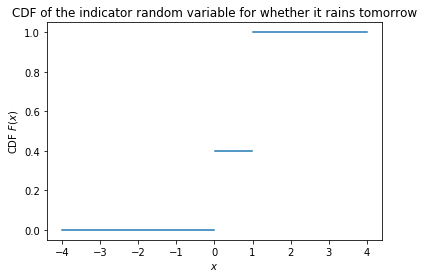

In [50]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-4,4,1000)
y=np.select([x<0,x<1, x>=1],[0,0.4,1])
break1=np.searchsorted(x,0)-1
break2=np.searchsorted(x,1)-1
x[break1]=x[break2]=np.nan
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('CDF $F(x)$')
plt.title('CDF of the indicator random variable for whether it rains tomorrow')
plt.show()


The CDF of a discrete random variable is always composed of flat portions between distinct values and jumps where the possible values occur. Contrast this with the CDF of the standard Normal random variable, graphed below. The analog of the PMF for a continuous random variable is called the **probability density function (PDF)**, which is defined to be the first derivative of the CDF, and corresponds to the relative likelihood of various values. Note that for a continuous random variable, the probability of it taking any specific value $x$ is zero, since it's very unlikely it is exactly that value to infinite decimal places. The PDF for continuous random variables is covered in DMD 3.2, which is a part of future readings.

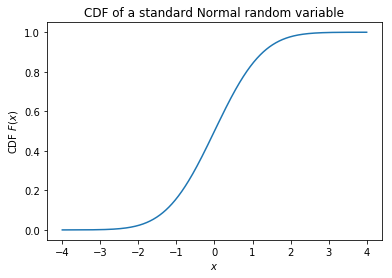

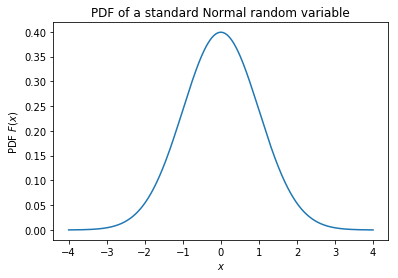

In [52]:
import scipy.stats
norm=scipy.stats.norm()
x=np.linspace(-4,4,1000)
plt.plot(x,norm.cdf(x))
plt.xlabel('$x$')
plt.ylabel('CDF $F(x)$')
plt.title('CDF of a standard Normal random variable')
plt.figure()
plt.plot(x,norm.pdf(x))
plt.xlabel('$x$')
plt.ylabel('PDF $F(x)$')
plt.title('PDF of a standard Normal random variable')
plt.show()

For a continuous random variable, the CDF will also be continuous, without any jumps. This is another way you can tell a discrete random variable apart from a continuous one. (If the CDF has jumps and also portions where it smoothly increases, then the random variable is neither discrete nor continuous.)

The CDF is defined for any kind of random variables, whereas the PMF is defined only for discrete random variables, and PDF is defined only for continuous random variables. The CDF $F(x)$ of any random variable is always 

- **between 0 and 1**. It approaches $0$ as $x$ decreases and approaches $1$ as $x$ increases.
- **weakly increasing** (meaning that it is either flat or increasing). This is also known as **non-decreasing**.
- right continuous (this is a technical term meaning that at any jump, the function value at that jump is equal to the higher value; you won't need to know this for the exam.)